In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [31]:
# [Step 1] Load the processed datasets
PoliceKillingUS = pd.read_csv('../processed_datasets/ProcessedPoliceKillingUS.csv', encoding='utf-8')
PoliceKillingUS = PoliceKillingUS[PoliceKillingUS['date'] == 2015]  # Filter for 2015 data
PoliceKillingUS.head()

,state,count,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,percentage
0,AK,4,2015,shot,gun,33.0,M,N,Fairbanks,False,attack,Car,False,0.403633
1,AL,17,2015,shot,gun,36.0,M,W,Arab,False,attack,Not fleeing,False,1.715439
2,AR,5,2015,shot,gun,31.0,M,W,Cabot,False,attack,Not fleeing,False,0.504541
3,AZ,42,2015,shot,gun,28.0,M,W,Phoenix,False,attack,Not fleeing,False,4.238143
4,CA,189,2015,shot,gun,27.0,M,H,Los Angeles,False,attack,Not fleeing,False,19.071645


In [32]:
PovertyUS = pd.read_csv('../processed_datasets/ProcessedPovertyUS.csv', encoding='utf-8')
PovertyUS = PovertyUS[PovertyUS['Year'] == 2015]  # Filter for 2015 data
PovertyUS.head()

,Unnamed: 0,Year,ID,Name,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1
0,209,2015,1000,AL,4736374,875853,"859,781 to 891,925",18.5,18.2 to 18.8
1,210,2015,2000,AK,720764,74941,"71,399 to 78,483",10.4,9.9 to 10.9
2,211,2015,4000,AZ,6671708,1159046,"1,136,666 to 1,181,426",17.4,17.1 to 17.7
3,212,2015,5000,AR,2887336,540733,"528,756 to 552,710",18.7,18.3 to 19.1
4,213,2015,6000,CA,38398077,5896255,"5,844,717 to 5,947,793",15.4,15.3 to 15.5


In [33]:
PopulationUS = pd.read_csv('../processed_datasets/ProcessedPopulationUS_2015.csv', encoding='latin1')
PopulationUS.head()

,Unnamed: 0,State,Total_Population
0,0,AK,712898
1,1,AL,3167669
2,2,AR,2004830
3,3,AZ,6161288
4,4,CA,36359352


In [34]:
# [Step 2] Merge the datasets on 'state' and 'Name'
Joined = pd.merge(PoliceKillingUS, PovertyUS, left_on='state', right_on='Name', how='inner')
Joined.head()

,state,count,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,...,percentage,Unnamed: 0,Year,ID,Name,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1
0,AK,4,2015,shot,gun,33.0,M,N,Fairbanks,False,...,0.403633,210,2015,2000,AK,720764,74941,"71,399 to 78,483",10.4,9.9 to 10.9
1,AL,17,2015,shot,gun,36.0,M,W,Arab,False,...,1.715439,209,2015,1000,AL,4736374,875853,"859,781 to 891,925",18.5,18.2 to 18.8
2,AR,5,2015,shot,gun,31.0,M,W,Cabot,False,...,0.504541,212,2015,5000,AR,2887336,540733,"528,756 to 552,710",18.7,18.3 to 19.1
3,AZ,42,2015,shot,gun,28.0,M,W,Phoenix,False,...,4.238143,211,2015,4000,AZ,6671708,1159046,"1,136,666 to 1,181,426",17.4,17.1 to 17.7
4,CA,189,2015,shot,gun,27.0,M,H,Los Angeles,False,...,19.071645,213,2015,6000,CA,38398077,5896255,"5,844,717 to 5,947,793",15.4,15.3 to 15.5


In [35]:
Joined = pd.merge(Joined, PopulationUS, left_on='state', right_on='State', how='inner')
Joined['Numbers_of_Deaths_with_Population_Factor'] = Joined.apply(lambda x: x['count']/x['Total_Population'], axis=1)
Joined['Poverty_with_Population_Factor'] = Joined.apply(lambda x: x['Number in Poverty']/x['Total_Population'], axis=1)
Joined.head()

,state,count,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,...,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1,Unnamed: 0_y,State,Total_Population,Numbers_of_Deaths_with_Population_Factor,Poverty_with_Population_Factor
0,AK,4,2015,shot,gun,33.0,M,N,Fairbanks,False,...,720764,74941,"71,399 to 78,483",10.4,9.9 to 10.9,0,AK,712898,0.000006,0.105122
1,AL,17,2015,shot,gun,36.0,M,W,Arab,False,...,4736374,875853,"859,781 to 891,925",18.5,18.2 to 18.8,1,AL,3167669,0.000005,0.276498
2,AR,5,2015,shot,gun,31.0,M,W,Cabot,False,...,2887336,540733,"528,756 to 552,710",18.7,18.3 to 19.1,2,AR,2004830,0.000002,0.269715
3,AZ,42,2015,shot,gun,28.0,M,W,Phoenix,False,...,6671708,1159046,"1,136,666 to 1,181,426",17.4,17.1 to 17.7,3,AZ,6161288,0.000007,0.188117
4,CA,189,2015,shot,gun,27.0,M,H,Los Angeles,False,...,38398077,5896255,"5,844,717 to 5,947,793",15.4,15.3 to 15.5,4,CA,36359352,0.000005,0.162166


In [36]:
Joined.fillna(0, inplace=True)  # Replace missing values with 0
Joined.loc[Joined['state'] == 0, 'state'] = Joined.loc[Joined['state'] == 0, 'Name']  # Replace missing state names
Joined.head()

,state,count,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,...,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1,Unnamed: 0_y,State,Total_Population,Numbers_of_Deaths_with_Population_Factor,Poverty_with_Population_Factor
0,AK,4,2015,shot,gun,33.0,M,N,Fairbanks,False,...,720764,74941,"71,399 to 78,483",10.4,9.9 to 10.9,0,AK,712898,0.000006,0.105122
1,AL,17,2015,shot,gun,36.0,M,W,Arab,False,...,4736374,875853,"859,781 to 891,925",18.5,18.2 to 18.8,1,AL,3167669,0.000005,0.276498
2,AR,5,2015,shot,gun,31.0,M,W,Cabot,False,...,2887336,540733,"528,756 to 552,710",18.7,18.3 to 19.1,2,AR,2004830,0.000002,0.269715
3,AZ,42,2015,shot,gun,28.0,M,W,Phoenix,False,...,6671708,1159046,"1,136,666 to 1,181,426",17.4,17.1 to 17.7,3,AZ,6161288,0.000007,0.188117
4,CA,189,2015,shot,gun,27.0,M,H,Los Angeles,False,...,38398077,5896255,"5,844,717 to 5,947,793",15.4,15.3 to 15.5,4,CA,36359352,0.000005,0.162166


In [37]:
# [Step 3] Create log-transformed columns for poverty and killings
Joined['Log Poverty'] = Joined['Poverty_with_Population_Factor']
Joined['Log Killings'] = Joined['Numbers_of_Deaths_with_Population_Factor']
Joined.to_csv('./Joined.csv', index=False)  # Save the joined dataset for reference
X = Joined[['Log Poverty', 'Log Killings']]

In [38]:
xV1 = zscore(X.iloc[:, 0])
xV2 = zscore(X.iloc[:, 1])
X = np.transpose(np.array([xV1, xV2]))
print(X)

[[-1.41780848  0.25779158]
 [ 0.96777089  0.16980087]
 [ 0.87335747 -0.86540448]
 [-0.26249392  0.69232652]
 [-0.62374077  0.10904161]
 [-0.99507969  0.54037475]
 [-0.54939797 -1.4359476 ]
 [-0.44777215  0.46206114]
 [ 1.10454061  0.91222758]
 [ 0.01647337 -0.3257851 ]
 [ 2.07528416  0.41717378]
 [-1.34901493 -1.23206991]
 [-0.83086031 -1.03994084]
 [ 0.02409208  0.44188754]
 [-0.78949422 -1.09612129]
 [-0.04220898 -0.25363079]
 [-0.77689636 -0.42488538]
 [ 1.3655794   0.47276563]
 [ 1.16293093  1.42673812]
 [-0.66369928 -1.07753117]
 [-1.22385906 -0.66099705]
 [ 0.96664131 -0.6009251 ]
 [ 0.9595619  -0.72051804]
 [-1.18391578 -0.79937807]
 [-0.01001659  0.01824277]
 [ 2.50885141 -0.01702646]
 [-0.02776705  0.27870125]
 [ 0.92129723 -0.35551279]
 [-0.967154   -1.13385193]
 [-0.76110119  0.1898572 ]
 [-0.47940381 -0.04174473]
 [-0.42197058 -0.75469169]
 [ 0.36758363  2.38523079]
 [-0.64647538  0.82312849]
 [-0.2829369  -1.33608719]
 [-0.02862551 -0.48218769]
 [-0.06738206  2.0663603 ]
 

In [39]:
# [Step 6] Determine the number of clusters
numberOfRows, numberOfColumns = X.shape
k = int(input(f"Enter the number of clusters for K-means (from 2 to {numberOfRows}): "))
print(f"Number of clusters: {k}")

Number of clusters: 3


In [40]:
 # [Step 7] Apply K-Means clustering
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
IDX = kmeans.labels_  # Get the labels of each cluster
print(IDX)

[1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 2 1 1 0 0 1 1 0 1 0 1 1 1 1 2 1 1 1 2
 1 1 0 1 0 1 1 1 0 1 1 2 2]


In [41]:
C = kmeans.cluster_centers_  # Get the cluster centers
print(C)

[[ 1.27805641  0.03641553]
 [-0.5592385  -0.36387197]
 [ 0.62363875  2.31415777]]


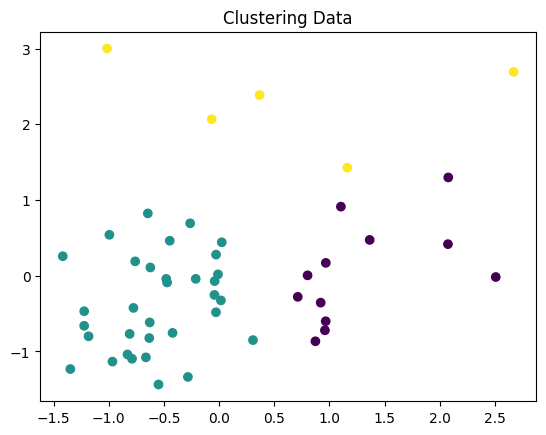

In [42]:
# [Step 8] Plotting the data points and clusters
plt.figure(1)
# -- ΑΛΛΑΓΗ 5 --
plt.scatter(X[:, 0], X[:, 1], c=IDX)  # Plot all data without clustering
# ----------------
plt.title("Clustering Data")
plt.show()

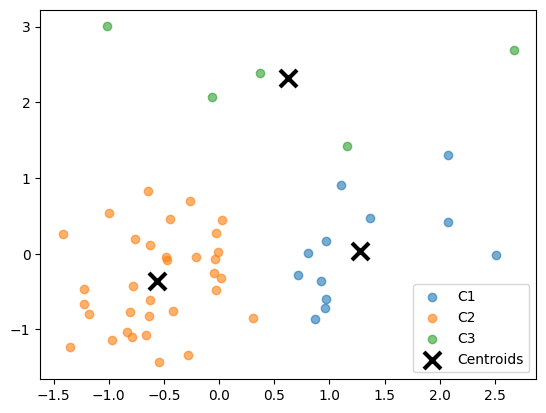

In [43]:
# [Step 9] Plot each cluster with different colors
colors = ['limegreen', 'yellow', 'c', 'purple']
for i in range(k):
    plt.scatter(X[IDX == i, 0], X[IDX == i, 1], label=f'C{i+1}', alpha=0.6)

# [Step 10] Plot the centroids
plt.scatter(C[:, 0], C[:, 1], marker='x', color='black', s=150, linewidth=3, label="Centroids", zorder=10)
plt.legend()
plt.show()

In [44]:
"""
        Draw the SSE Plot
"""
def plot_sse(max_clusters=10):
    # [Step 12.1] Calculate the SSE for different numbers of clusters
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    # [Step 12.2] Plot SSE vs. number of clusters to determine the optimal number of clusters (elbow method)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method For Optimal k')
    plt.show()

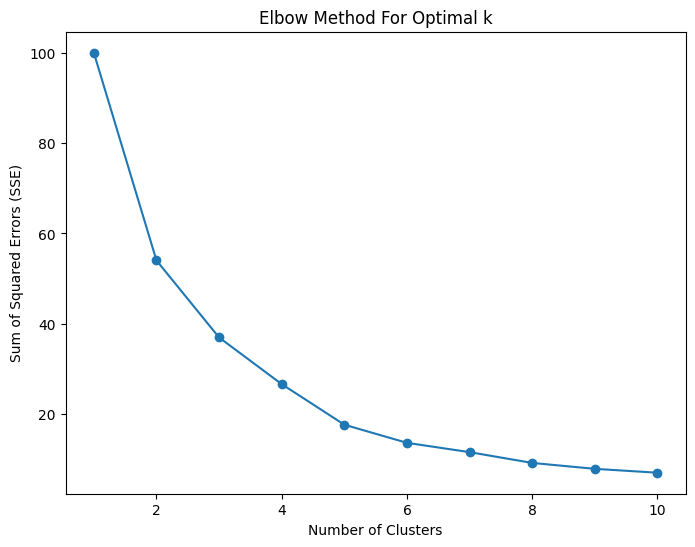

In [45]:
plot_sse(max_clusters=10)

In [46]:
# [Step 11] Print clustering metrics
print("\n\nSSE (Sum of Squared Errors) = %.3f" % kmeans.inertia_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, IDX))



SSE (Sum of Squared Errors) = 36.972
Silhouette Coefficient: 0.453
